Aturan dan Kriteria Penilaian untuk Menjawab Soal Analisis Data
1. Identitas Mahasiswa <br>
a. Pastikan notebook berisi NIM, Nama, dan Kelas yang diletakkan di bagian atas notebook. <br>
b. Format header :
<hr>
NIM : [10123171] <br>
Nama : [Agung Rezalky] <br>
Kelas : [IF-4] <br>
Kode Soal : [PDSD-01]

1. Bagaimana mengetahui statistik jumlah transaksi per bulan selama tahun 2015. Berdasarkan statistik
yang diperoleh, akan didapatkan informasi pada bulan apa jumlah penjualan paling sedikit, serta yang
paling banyak (40 Point).

# MEMANGGIL LIBRARY

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# DATA WRANGLING

## ( GATHERING ACCESING CLEANING ) DATA

In [25]:
df = pd.read_csv('Sample-Superstore.csv',sep=',')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
# Mengecek data yang hilang / cek Missing values
print(df.isna().sum())
# dan ternyata kosong semua,apabila terapat kondisi dimana anda memiliki missing values,anda dapat  menghapusnya dengan cara 
# df.dropna()
# untuk melihat type-type dari sebuah column
df.info()

# melihat deskripsi colom dan mengecek count,mean,std,min,q1,median,q3,max
df.describe()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   objec

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# CEK DATA DUPLIKAT

In [27]:
# mengecek data duplikat
df.duplicated()
# setelah dicekternyata tidak ada data yang True(Duplikat)
# dan dibawah ini adalah cara menghapus data duplikat apabila ada
# df.drop_duplicates()

# seharusnya ngecek nilai isna itu setelah cek data duplikat

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

## karna semua Datanya tidak ada yang duplikat,maka kita tidak perlu menghapusnya

# FORMAT DATA 

In [28]:
# karna Dtype dari tanggal adalah datetime,maka ubahlah terlebih dahulu
# ubah dulu tipe object dari 'object' menjadi 'datetime'
df['Order Date'] = pd.to_datetime(df['Order Date'])
# mengecek kembali type dari sebuah object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Terlihat,bahwa Dtype oleh Order Date telah berubah menjadi Datetime

# MENGHITUNG PENJUALAN PER BULAN

In [29]:
# menghitung penjualan perbulan
monthly_sales=df.groupby(df['Order Date'].dt.month)['Sales'].sum()
# Solusi lain
# df['month] =  df['Order Date'].dt.month
# data_2015 = df[df['year'] == 2015]
monthly_sales
# definisikan max dan min
BulanPenjualanMax = monthly_sales.max()
BulanPenjualanMin = monthly_sales.min()
targetbulanmax = monthly_sales.idxmax()
targetbulanmin = monthly_sales.idxmin()

# Hasil
print(f'bulan dengan jumlahpenjualan terbanyak adalah : {BulanPenjualanMax} di bulan {targetbulanmax} ')
print(f'bulan dengan jumlahpenjualan terendah adalah : {BulanPenjualanMin} di bulan {targetbulanmin} ')

# 


bulan dengan jumlahpenjualan terbanyak adalah : 352461.071 di bulan 11 
bulan dengan jumlahpenjualan terendah adalah : 59751.2514 di bulan 2 


# VISUALISASI DATA

## Menggunakan Plot

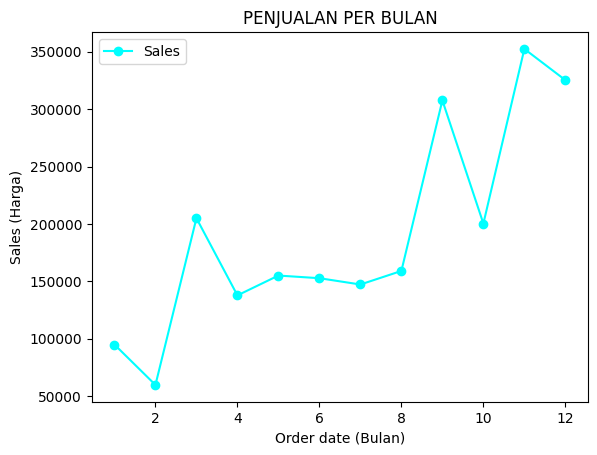

In [30]:
# visualisasi data
monthly_sales.plot(
    marker= 'o',
    color = 'cyan',
    label = 'Sales',
    # linestyle = '--'
    )
plt.title('PENJUALAN PER BULAN')
plt.xlabel('Order date (Bulan)')
plt.ylabel('Sales (Harga)')
plt.legend()
plt.show()

# kenapa saya memilih plot 
# karna data tersebut mengukur pertumbuhan , dan visualisasi plot adalah yang terbaik untuk melihat pertumbuhan total penjualan produk

## Dapat dilihat dari grafik, bahwasannya Bulan 11 mendapati dengan total penjualan tertinggi sedangkan bulan 2 mendapati total penjualan terendah

2. Pihak superstore ingin menganalisis jenis atau kategori produk atau nama produk apa yang paling
banyak menyebabkan kerugian, dan yang paling banyak memberikan keuntungan (profit) (40 Point).

## MENGHITUNG TOTAL PROFIT CATEGORY

In [31]:
# sebelum dicari keuntungan
ProfitCat =df.groupby('Category')['Profit'].sum()
ProfitCat

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

## MENGHITUNG KEUNTUNGAN DAN KERUGIAN 


In [32]:
# mencari keuntungan dan kerugian 
KeuntunganProfitCat = ProfitCat.max()
NamaKeuntunganProfitCat = ProfitCat.idxmax()
print('Jadi keuntungan profit yang didapat ialah :',KeuntunganProfitCat,'dengan Category',NamaKeuntunganProfitCat)

# mencari kerugian 
# mencari keuntungan dan kerugian 
KerugianProfitCat = ProfitCat.min()
NamaKerugianProfitCat = ProfitCat.idxmin()
print('Jadi Kerugian profit yang didapat ialah   :',KerugianProfitCat,'dengan Category',NamaKerugianProfitCat)


Jadi keuntungan profit yang didapat ialah : 145454.9481 dengan Category Technology
Jadi Kerugian profit yang didapat ialah   : 18451.272799999995 dengan Category Furniture


## MENGHITUNG TOTAL PROFIT SUB-CATEGORY

In [33]:
# sebelum dicari keuntungan
ProfitSub =df.groupby('Sub-Category')['Profit'].sum()
ProfitSub

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

## MENGHITUNG KEUNTUNGAN DAN KERUGIAN

In [34]:
# mencari keuntungan dan kerugian 
KeuntunganProfitSub = ProfitSub.max()
NamaKeuntunganProfitSub = ProfitSub.idxmax()
print('Jadi keuntungan profit yang didapat ialah :',KeuntunganProfitSub,'dengan Category',NamaKeuntunganProfitSub)

# mencari kerugian 
# mencari keuntungan dan kerugian 
KerugianProfitSub = ProfitSub.min()
NamaKerugianProfitSub = ProfitSub.idxmin()
print('Jadi Kerugian profit yang didapat ialah :',KerugianProfitSub,'dengan Category',NamaKerugianProfitSub)

Jadi keuntungan profit yang didapat ialah : 55617.8249 dengan Category Copiers
Jadi Kerugian profit yang didapat ialah : -17725.4811 dengan Category Tables


## MENGHITUNG TOTAL PROFIT PRODUCT NAME

In [35]:
# sebelum dicari keuntungan
# PName = Product Name
ProfitPName =df.groupby('Product Name')['Profit'].sum()
ProfitPName

Product Name
"While you Were Out" Message Book, One Form per Page                                                    10.3880
#10 Gummed Flap White Envelopes, 100/Box                                                                16.7678
#10 Self-Seal White Envelopes                                                                           52.1230
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             223.1408
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                115.2806
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    115.6440
iOttie HLCRIO102 Car Mount                                                                             -11.9940
iOttie XL Car Mount                                                                        

## MENGHITUNG KEUNTUNGAN DAN KERUGIAN

In [36]:
# mencari keuntungan dan kerugian 
KeuntunganProfitPName = ProfitPName.max()
NamaKeuntunganProfitPName = ProfitPName.idxmax()
print('Jadi keuntungan profit yang didapat ialah :',KeuntunganProfitPName,'dengan Nama Produk',NamaKeuntunganProfitPName)

# mencari kerugian 
# mencari keuntungan dan kerugian 
KerugianProfitPName = ProfitPName.min()
NamaKerugianProfitPName = ProfitPName.idxmin()
print('Jadi Kerugian profit yang didapat ialah :',KerugianProfitPName,'dengan Nama Produk',NamaKerugianProfitPName)

Jadi keuntungan profit yang didapat ialah : 25199.928 dengan Nama Produk Canon imageCLASS 2200 Advanced Copier
Jadi Kerugian profit yang didapat ialah : -8879.9704 dengan Nama Produk Cubify CubeX 3D Printer Double Head Print


## VISUALISASI DATA

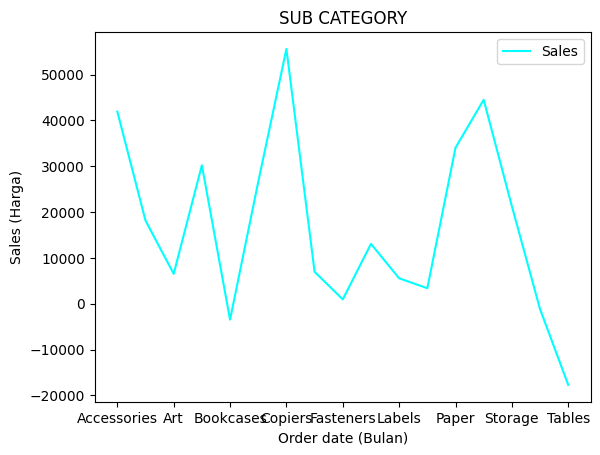

In [37]:
# visualisasi data
ProfitSub.plot(
    color = 'cyan',
    label = 'Sales',
    # linestyle = '--'
    )
plt.title('SUB CATEGORY')
plt.xlabel('Order date (Bulan)')
plt.ylabel('Sales (Harga)')
plt.legend()
plt.show()

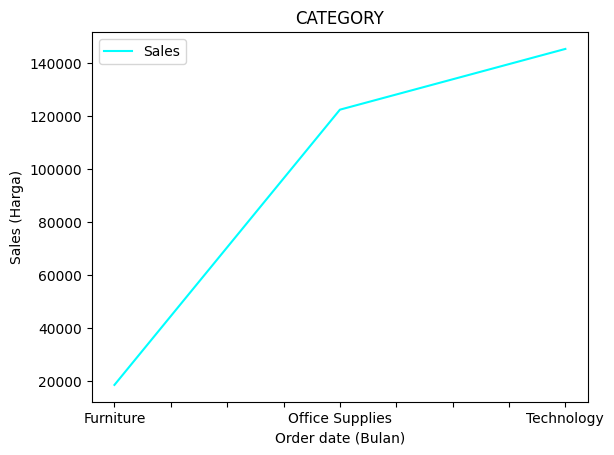

In [38]:
# visualisasi data
ProfitCat.plot(
    color = 'cyan',
    label = 'Sales',
    # linestyle = '--'
    )
plt.title('CATEGORY')
plt.xlabel('Order date (Bulan)')
plt.ylabel('Sales (Harga)')
plt.legend()
plt.show()

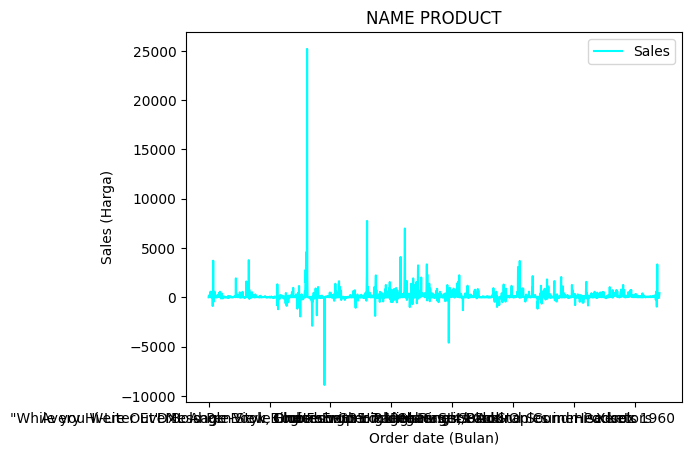

In [39]:
# visualisasi data
ProfitPName.plot(
    color = 'cyan',
    label = 'Sales',
    # linestyle = '--'
    )
plt.title('NAME PRODUCT')
plt.xlabel('Order date (Bulan)')
plt.ylabel('Sales (Harga)')
plt.xticks=90
plt.legend()
plt.show()